# Deep learning tutorial on Caffe technology : basic commands, Python and C++ code.

> 출처 : [Christopher Bourez's blog](http://christopher5106.github.io/deep/learning/2015/09/04/Deep-learning-tutorial-on-Caffe-Technology.html)

In [1]:
import caffe
import numpy as np
import matplotlib.pyplot as plt

Set the computation mode CPU

In [2]:
#Set the computation mode CPU
caffe.set_mode_cpu()

## 사전에정의한 네트워크 모델 

single convolution composed of 3 convolutional neurons, with kernel of size 5x5 and stride of 1



In [3]:
%cat conv.prototxt

name: "convolution"
input: "data"
input_dim: 1
input_dim: 1
input_dim: 100
input_dim: 100
layer {
  name: "conv"
  type: "Convolution"
  bottom: "data"
  top: "conv"
  convolution_param {
    num_output: 3
    kernel_size: 5
    stride: 1
    weight_filler {
      type: "gaussian"
      std: 0.01
    }
    bias_filler {
      type: "constant"
      value: 0
    }
  }
}


Drawing net to ./models/my_net.png


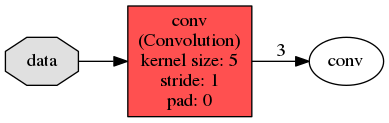

In [17]:
!/home/adioshun/miniconda3/envs/pycaffe2/bin/python2.7 ./tools/caffe_tool_draw_net.py ./models/conv.prototxt ./models/my_net.png
from IPython.display import Image 
Image(filename='./models/my_net.png')

## 네트워크 모델 Load하기 

In [5]:
net = caffe.Net('./models/conv.prototxt', caffe.TEST)

모델 정보 확인 하기 

In [6]:
print (net.inputs ) #The names of input layers of the net

['data']


In [7]:
print (net.blobs) #  input data and its propagation in the layers
print()
print(net.blobs['data']) #contains input data, an array of shape (1, 1, 100, 100)
print(net.blobs['conv']) #contains computed data in layer ‘conv’ (1, 3, 96, 96)
print()
print([(k, v.data.shape) for k, v in net.blobs.items()])

OrderedDict([('data', <caffe._caffe.Blob object at 0x7f258cb07c08>), ('conv', <caffe._caffe.Blob object at 0x7f258cb07d70>)])


[('data', (1, 1, 100, 100)), ('conv', (1, 3, 96, 96))]


In [8]:
print(net.params) # a vector of blobs for weight and bias parameters
print()
print(net.params['conv'][0]) # contains the weight parameters, an array of shape (3, 1, 5, 5)
print(net.params['conv'][1]) # contains the bias parameters, an array of shape (3,)
print()
print([(k, v[0].data.shape, v[1].data.shape) for k, v in net.params.items()])
print()
print(net.blobs['conv'].data.shape) # 

OrderedDict([('conv', <caffe._caffe.BlobVec object at 0x7f258ce2f2f0>)])


[('conv', (3, 1, 5, 5), (3,))]

(1, 3, 96, 96)


테스트 이미지 불러 오기

In [9]:
import PIL
im = np.array(PIL.Image.open('./datasets/cat_gray.jpg'))
im_input = im[np.newaxis, np.newaxis, :, :]


In [10]:
# We need to reshape the data blob (1, 1, 100, 100) to the new size (1, 1, 360, 480) to fit the image :
net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input

In [11]:
#Let’s compute the blobs given this input
net.forward()

{'conv': array([[[[ 0.82194054,  0.82857227,  0.94702429, ...,  1.74942231,
            1.79648137,  1.77591491],
          [ 0.85793048,  0.88702661,  0.90769809, ...,  1.8666923 ,
            1.96834421,  1.88528454],
          [ 0.92659354,  0.94043481,  0.86140835, ...,  2.00724459,
            1.99890006,  1.99122   ],
          ..., 
          [ 0.94752795,  1.05709207,  1.28409636, ...,  7.691998  ,
            6.32445192,  5.86062622],
          [ 1.0232929 ,  1.17744935,  1.29156184, ...,  7.07487202,
            7.41349888,  6.26801968],
          [ 1.06129897,  1.22492015,  1.27815449, ...,  6.77879667,
            6.88334656,  6.98104286]],
 
         [[ 0.0822024 ,  0.15182117,  0.21962987, ...,  0.02257956,
            0.11707326,  0.19353023],
          [ 0.14612596,  0.09275593,  0.15214884, ...,  0.05223754,
            0.09313586,  0.20706335],
          [ 0.20964506,  0.17827438,  0.12575838, ...,  0.04407001,
            0.03104823,  0.14677249],
          ..., 
   

In [12]:
#To save the net parameters net.params, just call :

net.save('./models/mymodel.caffemodel')

# Load pretrained parameters to classify an image

>미리 학습된 네트워크에 Input으로 고양이 이미지를 주고 예측 값 확인 


- 목적에 따른 여러 모델들이 [Caffe Model Zoo,]에 저장 되어 있음 eg. 꽃 분류, 자동차 분류 등. 
- 각 모델 정보는 `Github Gist format`로 정의 되어 있음 
- 파라미터는 `.caffemodel`에 저장되어 있음 

caffe에서 제공하는 스크립트를 이용하여 모델들을 쉽게 다운 로드 할수 있음 
- `./scripts/download_model_from_gist.sh <gist_id>`
- `./scripts/download_model_binary.py <dirname>`

본 실습에서는 다음 두 파일을 활용 하려 한다. 
- deploy.prototxt (네트워크 모델)
- bvlc_reference_caffenet.caffemodel (네트워크 가중치 값)


In [32]:
!cat ./models/deploy.prototxt

name: "CaffeNet"
layer {
  name: "data"
  type: "Input"
  top: "data"
  input_param { shape: { dim: 10 dim: 3 dim: 227 dim: 227 } }
}
layer {
  name: "conv1"
  type: "Convolution"
  bottom: "data"
  top: "conv1"
  convolution_param {
    num_output: 96
    kernel_size: 11
    stride: 4
  }
}
layer {
  name: "relu1"
  type: "ReLU"
  bottom: "conv1"
  top: "conv1"
}
layer {
  name: "pool1"
  type: "Pooling"
  bottom: "conv1"
  top: "pool1"
  pooling_param {
    pool: MAX
    kernel_size: 3
    stride: 2
  }
}
layer {
  name: "norm1"
  type: "LRN"
  bottom: "pool1"
  top: "norm1"
  lrn_param {
    local_size: 5
    alpha: 0.0001
    beta: 0.75
  }
}
layer {
  name: "conv2"
  type: "Convolution"
  bottom: "norm1"
  top: "conv2"
  convolution_param {
    num_output: 256
    pad: 2
    kernel_size: 5
    group: 2
  }
}
layer {
  name: "relu2"
  type: "ReLU"
  bottom: "conv2"
  top: "conv2"
}
layer {
  name: "pool2"
  type: "Pooling"
  bottom: "conv2"
  top: "pool2"
  pooling_param {
    pool

In [31]:
#!cd ./models/;wget http://dl.caffe.berkeleyvision.org/bvlc_reference_caffenet.caffemodel
#!cd ./models/;wget https://raw.githubusercontent.com/BVLC/caffe/master/models/bvlc_reference_caffenet/deploy.prototxt

In [30]:
# 모델 구조 살펴 보기 
#!/home/adioshun/miniconda3/envs/pycaffe2/bin/python2.7 ./tools/caffe_tool_draw_net.py ./models/bclv_reference_caffenet/deploy.prototxt ./models/caffenet.png
#from IPython.display import Image 
#Image(filename='./models/caffenet.png')

In [21]:
#네트워크모델과 가중치 정보 읽어 오기 load the model
net = caffe.Net('./models/deploy.prototxt',
                './models/bvlc_reference_caffenet.caffemodel',
                caffe.TEST)

In [22]:
# load input and configure preprocessing
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_mean('data', np.load('./datasets/ilsvrc_2012_mean.npy').mean(1).mean(1))
transformer.set_transpose('data', (2,0,1))
transformer.set_channel_swap('data', (2,1,0))
transformer.set_raw_scale('data', 255.0)


## 이미지 전처리 
This model has been trained on processed images, so you need to preprocess the image with a preprocessor, before saving it in the blob.

In [23]:
#note we can change the batch size on-the-fly
#since we classify only one image, we change batch size from 10 to 1
net.blobs['data'].reshape(1,3,227,227)

In [24]:
#load the image in the data layer
im = caffe.io.load_image('datasets/cat.jpg')
net.blobs['data'].data[...] = transformer.preprocess('data', im)

/home/adioshun/miniconda3/envs/pycaffe2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [25]:
#compute
out = net.forward()
# other possibility : out = net.forward_all(data=np.asarray([transformer.preprocess('data', im)]))


In [27]:
#predicted predicted class
print(out['prob'].argmax())

281


In [29]:
#print predicted labels
labels = np.loadtxt("datasets/synset_words.txt", str, delimiter='\t')
top_k = net.blobs['prob'].data[0].flatten().argsort()[-1:-6:-1]
print(labels[top_k])

['n02123045 tabby, tabby cat' 'n02123159 tiger cat'
 'n02124075 Egyptian cat' 'n02119022 red fox, Vulpes vulpes'
 'n02127052 lynx, catamount']


Go further : [Create a classification map with net surgery to insert a trained model into an extended model where convolutions will be innerproducts spatially](http://nbviewer.ipython.org/github/BVLC/caffe/blob/master/examples/net_surgery.ipynb)

# Learn : solve the params on training data

It is now time to create your own model, and training the parameters on training data.

To train a network, you need

- its model definition, as seen previously

- a second protobuf file, the solver file, describing the parameters for the stochastic gradient.

### 1. 네트워크 모델 생성 `.prototxt`

- 학습용 & 테스트용 모델을 따로 만들거나 

```
train_net: "examples/hdf5_classification/nonlinear_auto_train.prototxt"
test_net: "examples/hdf5_classification/nonlinear_auto_test.prototxt"
```

- 하나를 만들고 `phase: TRAIN / phase: TEST`로 구분 하여 사용 가능 , `soruce`를 통해 학습/테스트용 데이터 위치도 지정 가능 

```python
layer {
  name: "data"
  type: "Data"
  top: "data"
  top: "label"
  include {
    phase: TRAIN
  }
  data_param {
    source: "examples/imagenet/ilsvrc12_train_lmdb"
    batch_size: 256
    backend: LMDB
  }
}

```

## 2. 학습 설정 정보 생성 `solver.prototxt`

In [33]:
!cd models; wget https://raw.githubusercontent.com/BVLC/caffe/master/models/bvlc_reference_caffenet/solver.prototxt
!cat ./models/solver.prototxt
solver = caffe.get_solver('./models/solver.prototxt') # Default로  SGD solver 사용 
# solver = caffe.SGDSolver('models/bvlc_reference_caffenet/solver.prototxt') #이처럼  SGD solver로 직접 지정할수도 있음 

--2017-08-04 16:20:14--  https://raw.githubusercontent.com/BVLC/caffe/master/models/bvlc_reference_caffenet/solver.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.64.133, 151.101.128.133, 151.101.192.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315 [text/plain]
Saving to: ‘solver.prototxt’

solver.prototxt     100%[===================>]     315  --.-KB/s    in 0s      

2017-08-04 16:20:14 (59.9 MB/s) - ‘solver.prototxt’ saved [315/315]

net: "models/bvlc_reference_caffenet/train_val.prototxt"
test_iter: 1000
test_interval: 1000
base_lr: 0.01
lr_policy: "step"
gamma: 0.1
stepsize: 100000
display: 20
max_iter: 450000
momentum: 0.9
weight_decay: 0.0005
snapshot: 10000
snapshot_prefix: "models/bvlc_reference_caffenet/caffenet_train"
solver_mode: GPU


In [35]:
# solver.prototxt에서 사용하는 파일 다운 로드 
!cd ./models/bvlc_reference_caffenet/;wget https://raw.githubusercontent.com/BVLC/caffe/master/models/bvlc_reference_caffenet/train_val.prototxt
!cat ./models/bvlc_reference_caffenet/train_val.prototxt    
    

--2017-08-04 16:24:42--  https://raw.githubusercontent.com/BVLC/caffe/master/models/bvlc_reference_caffenet/train_val.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.44.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.44.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5707 (5.6K) [text/plain]
Saving to: ‘train_val.prototxt.2’

train_val.prototxt. 100%[===================>]   5.57K  --.-KB/s    in 0s      

2017-08-04 16:24:42 (45.0 MB/s) - ‘train_val.prototxt.2’ saved [5707/5707]

name: "CaffeNet"
layer {
  name: "data"
  type: "Data"
  top: "data"
  top: "label"
  include {
    phase: TRAIN
  }
  transform_param {
    mirror: true
    crop_size: 227
    mean_file: "data/ilsvrc12/imagenet_mean.binaryproto"
  }
# mean pixel / channel-wise mean instead of mean image
#  transform_param {
#    crop_size: 227
#    mean_value: 104
#    mean_value: 117
#    mean_value: 123
#    mirror: true
#  }
 

In [36]:
solver.net.forward()  # train net

NameError: name 'solver' is not defined

Now, it’s time to begin to see if everything works well and to fill the layers in a forward propagation in the net (computation of net.blobs[k].data from input layer until the loss layer) :

In [ ]:
solver.net.forward()  # train net
solver.test_nets[0].forward()  # test net (there can be more than one)

For the computation of the gradients (computation of the net.blobs[k].diff and net.params[k][j].diff from the loss layer until input layer) :

In [ ]:
solver.net.backward()

To launch one step of the gradient descent, that is a forward propagation, a backward propagation and the update of the net params given the gradients (update of the net.params[k][j].data) :

In [ ]:
solver.step(1)

To run the full gradient descent, that is the max_iter steps :

In [ ]:
solver.solve()